In [4]:
from google.colab import files
upload = files.upload()

Saving Customer Sale Dataset for Visualization.csv to Customer Sale Dataset for Visualization.csv


Import Essential Libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

Load the Date Set

In [8]:
df = pd.read_csv("Customer Sale Dataset for Visualization.csv")
df.head()

,Customer Name,Purchase Date,Product Category,Sale,Quantity,Discount Applied,Purchase Year,Purchase Month,Purchase Day,Price
0,Allison Hill,2025-02-04,Electronics,372.07,1,True,2025,2,1,241.07
1,Megan Mcclain,2025-01-14,Books,369.55,3,True,2025,1,1,103.55
2,Allen Robinson,2025-03-20,Groceries,19.75,1,True,2025,3,3,16.75
3,Cristian Santos,2025-03-27,Books,303.00,9,True,2025,3,3,83.00
4,Kevin Pacheco,2025-01-02,Groceries,227.36,4,False,2025,1,3,78.36


In [10]:
#check the datatypes and number of rows/columns
print("Shape of Dataset:> ", df.shape)
print("\nColumn names:> ", df.columns.tolist())
print(df.info())
print(df.describe())

Shape of Dataset:>  (1000, 10)

Column names:>  ['Customer Name', 'Purchase Date', 'Product Category', 'Sale', 'Quantity', 'Discount Applied', 'Purchase Year', 'Purchase Month', 'Purchase Day', 'Price']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer Name     1000 non-null   object 
 1   Purchase Date     1000 non-null   object 
 2   Product Category  1000 non-null   object 
 3   Sale              1000 non-null   float64
 4   Quantity          1000 non-null   int64  
 5   Discount Applied  1000 non-null   bool   
 6   Purchase Year     1000 non-null   int64  
 7   Purchase Month    1000 non-null   int64  
 8   Purchase Day      1000 non-null   int64  
 9   Price             1000 non-null   float64
dtypes: bool(1), float64(2), int64(4), object(3)
memory usage: 71.4+ KB
None
              Sale     Quantity  Purchase Year  Pu

Data Cleaning

In [11]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])
print("Missing Values:>\n", df.isnull().sum())

Missing Values:>
 Customer Name       0
Purchase Date       0
Product Category    0
Sale                0
Quantity            0
Discount Applied    0
Purchase Year       0
Purchase Month      0
Purchase Day        0
Price               0
dtype: int64


Grouping the data by product category and add the sales values to see which category earns most

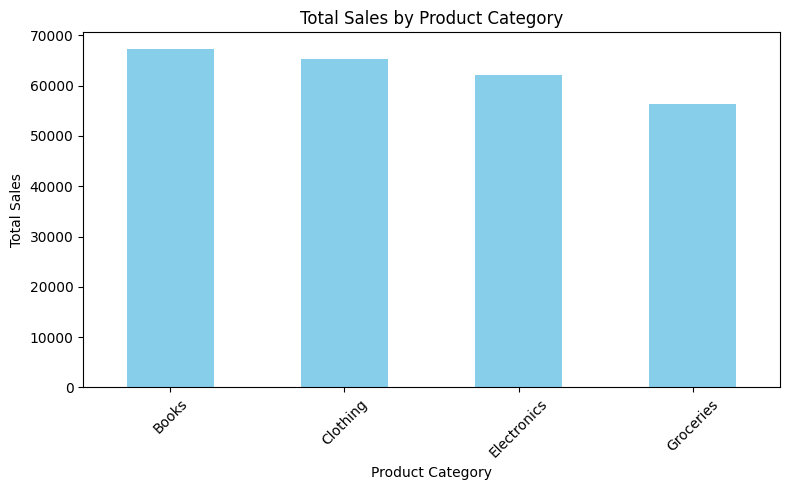

In [14]:
category_sales = df.groupby('Product Category')['Sale'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar', figsize=(8,5), title="Total Sales by Product Category", color='skyblue')
plt.ylabel('Total Sales')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The below code tells us which product categories are sold most frequently regardless of price

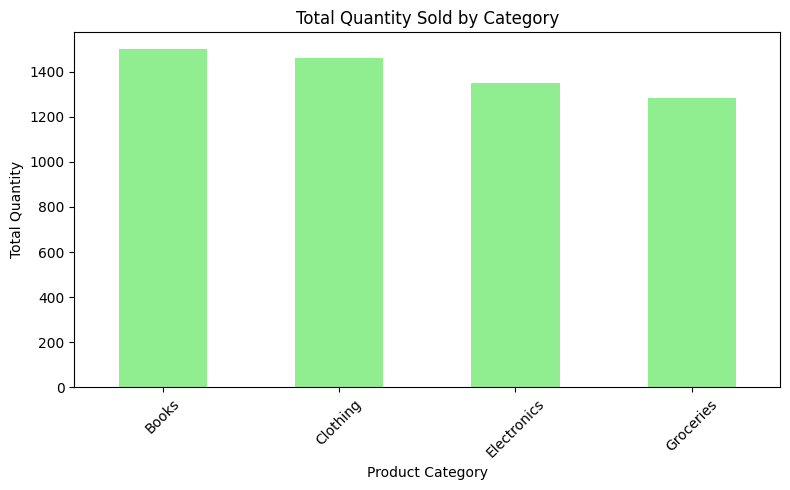

In [44]:
category_quantity = df.groupby('Product Category')['Quantity'].sum()
category_quantity.plot(kind='bar', figsize=(8,5), title='Total Quantity Sold by Category', color='lightgreen')
plt.ylabel("Total Quantity")
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We analyze how sales vary month-to-month to identify seasonal trends

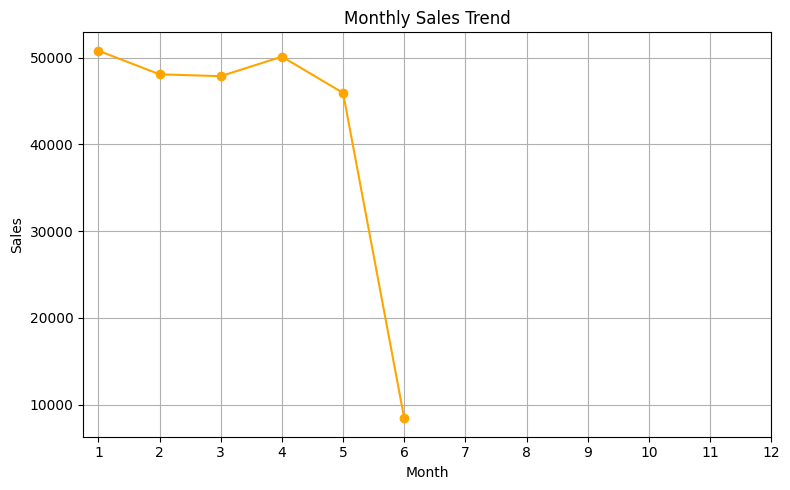

In [30]:
monthly_sales = df.groupby('Purchase Month')['Sale'].sum()
monthly_sales.plot(kind='line', marker='o',figsize=(8,5), title='Monthly Sales Trend', color='orange')
plt.ylabel('Sales')
plt.xlabel('Month')
plt.xticks(range(1,13))
plt.grid(True)
plt.tight_layout()
plt.show()

comparing total sales for transcations with and without discount

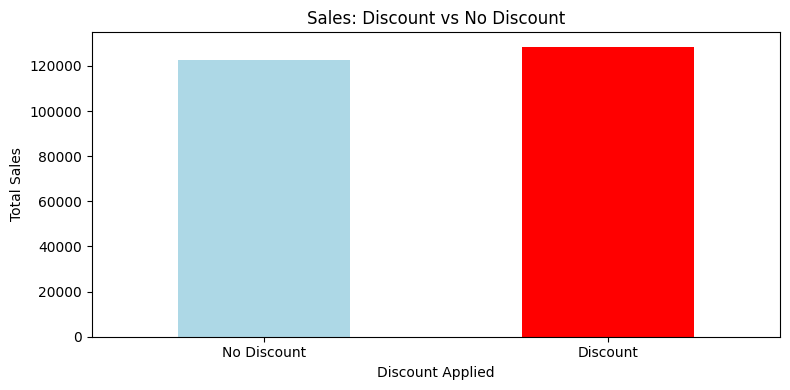

In [35]:
discount_sales = df.groupby('Discount Applied')['Sale'].sum()
discount_sales.plot(kind='bar', figsize=(8,4), title='Sales: Discount vs No Discount', color=['lightblue','red'])
plt.ylabel('Total Sales')
plt.xticks([0,1], ['No Discount', 'Discount'], rotation=0)
plt.tight_layout()
plt.show()

product categories tend to generate higher-value transactions on average.

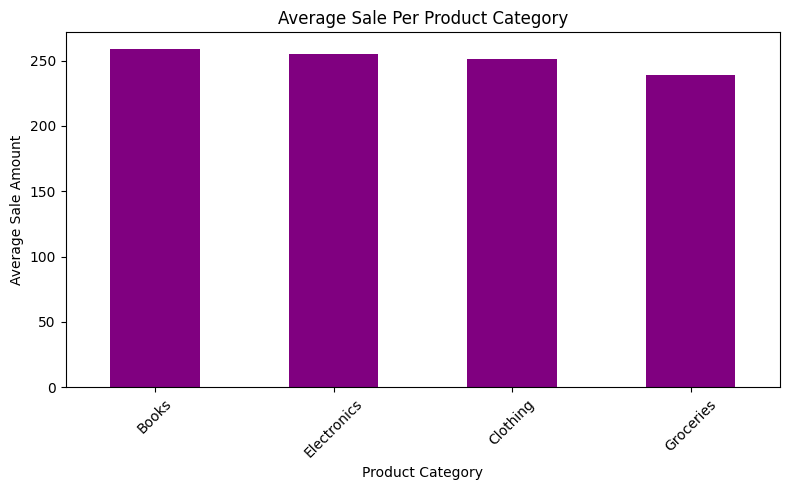

In [41]:
avg_sale_category = df.groupby('Product Category')['Sale'].mean().sort_values(ascending=False)
avg_sale_category.plot(kind='bar', figsize=(8,5), title='Average Sale Per Product Category', color='purple')
plt.ylabel('Average Sale Amount')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

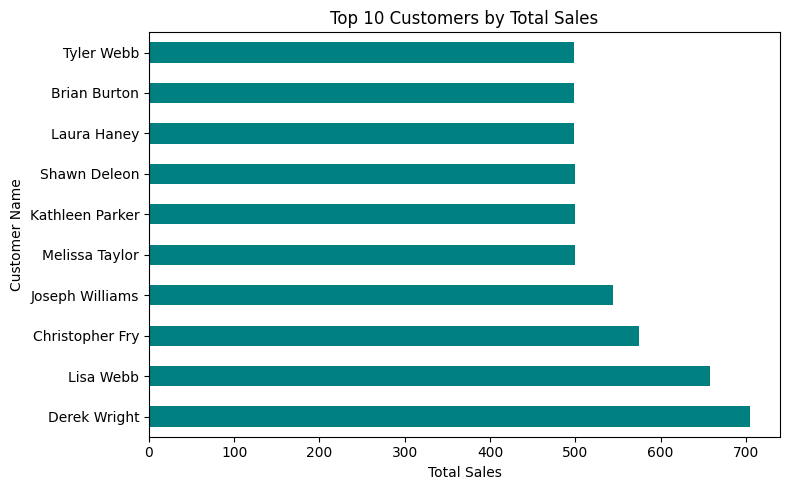

In [43]:
top_customers = df.groupby('Customer Name')['Sale'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='barh', figsize=(8,5), title='Top 10 Customers by Total Sales', color='teal')
plt.xlabel('Total Sales')
plt.ylabel('Customer Name')
plt.tight_layout()
plt.show()